In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [10]:
dataset = pd.read_csv('AirPassengers.csv')
#Parse Strings to datetimetype
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])
dataset.head(10)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [11]:
from datetime import datetime
indexedDataset.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


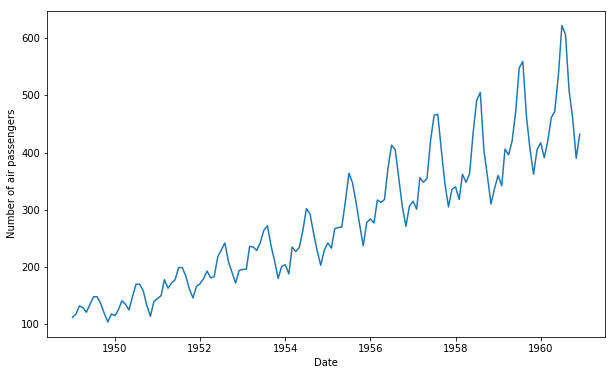

In [12]:
#plot graph 
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [13]:
#determining rolling statistics
rollmean = indexedDataset.rolling(window = 12).mean()

rollstd = indexedDataset.rolling(window = 12).std()

rollmean,rollstd

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
 1949-08-01          NaN
 1949-09-01          NaN
 1949-10-01          NaN
 1949-11-01          NaN
 1949-12-01   126.666667
 1950-01-01   126.916667
 1950-02-01   127.583333
 1950-03-01   128.333333
 1950-04-01   128.833333
 1950-05-01   129.166667
 1950-06-01   130.333333
 1950-07-01   132.166667
 1950-08-01   134.000000
 1950-09-01   135.833333
 1950-10-01   137.000000
 1950-11-01   137.833333
 1950-12-01   139.666667
 1951-01-01   142.166667
 1951-02-01   144.166667
 1951-03-01   147.250000
 1951-04-01   149.583333
 1951-05-01   153.500000
 1951-06-01   155.916667
 ...                 ...
 1958-07-01   376.333333
 1958-08-01   379.500000
 1958-09-01   379.500000
 1958-10-01   380.500000
 1958-11-01   380.916667
 1958-12-01   381.000000
 1959-01-01   382.666667


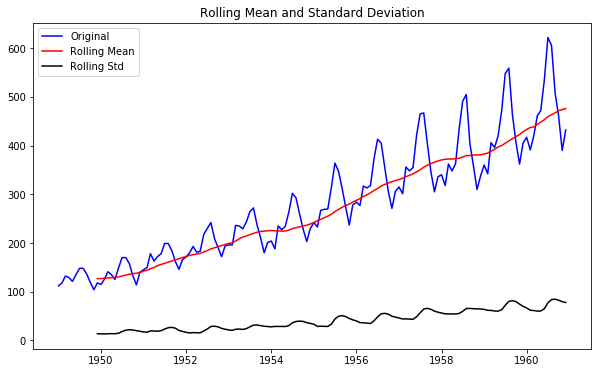

In [14]:
orig = plt.plot(indexedDataset, color = 'blue',label = 'Original')
mean = plt.plot(rollmean, color = 'red',label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black',label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block = False)

In [15]:
#Performing Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Results from the Dickey-Fuller Test')
dftest = adfuller(indexedDataset["#Passengers"], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

if(max(dfoutput[[0,4,5,6]]))!=dfoutput[0] and dfoutput[1]<=0.5:
        print('\nThe dataset is stationary')
else:
    print('\nNot stationary')

Results from the Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Not stationary


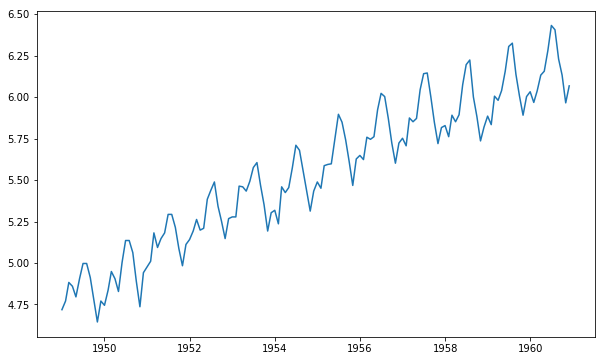

In [16]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

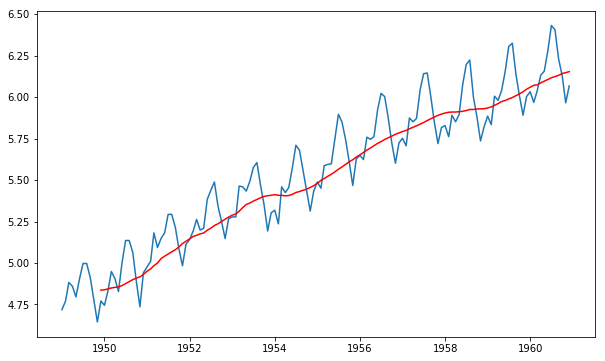

In [17]:
#determining rolling statistics
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()

movingSTD = indexedDataset_logScale.rolling(window = 12).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [18]:
dfDiff = indexedDataset_logScale - movingAverage
# dfDiff.head(20)

#Remove NaN values
dfDiff.dropna(inplace = True)
dfDiff.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling Statistics
    
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue',label = 'Original')
    mean = plt.plot(movingAverage, color = 'red',label = 'Moving Average')
    std = plt.plot(movingSTD, color = 'black',label = 'Moving Std')

    plt.legend(loc = 'best')
    plt.title('Moving Average and Moving Standard Deviation')
    plt.show(block = False)
    
    #Perfomr Dickey-Fuller Test
    print('Results from the Dickey-Fuller Test')
    dftest = adfuller(timeseries["#Passengers"], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
    
    if(max(dfoutput[[0,4,5,6]]))!=dfoutput[0] and dfoutput[1]<=0.5:
        print('\nThe dataset is stationary')
    else:
        print('\nNot stationary')

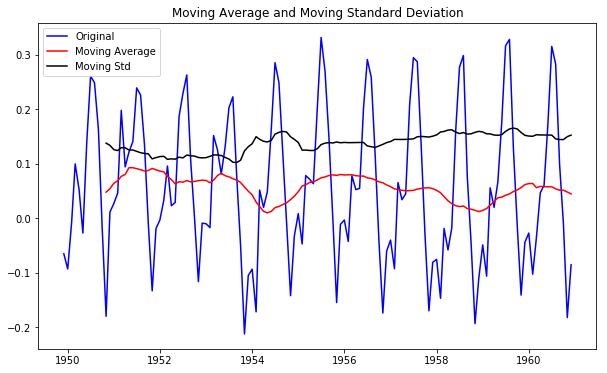

Results from the Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

The dataset is stationary


In [20]:
test_stationarity(dfDiff)

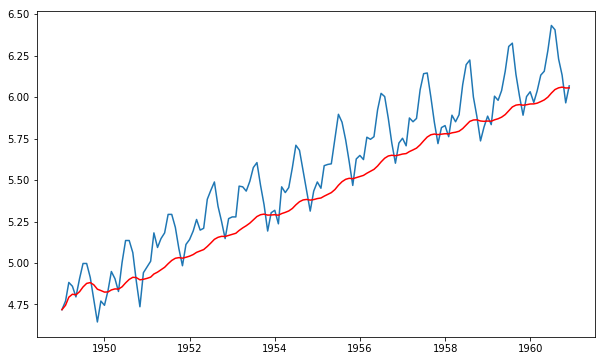

In [21]:
expDecayWAve = indexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(expDecayWAve, color = 'red')

In [22]:
dfDiff1 = indexedDataset_logScale - expDecayWAve
# dfDiff.head(20)

#Remove NaN values
dfDiff1.dropna(inplace = True)
dfDiff1.head(10)

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415
1949-06-01,0.078468
1949-07-01,0.141648
1949-08-01,0.120164
1949-09-01,0.030677


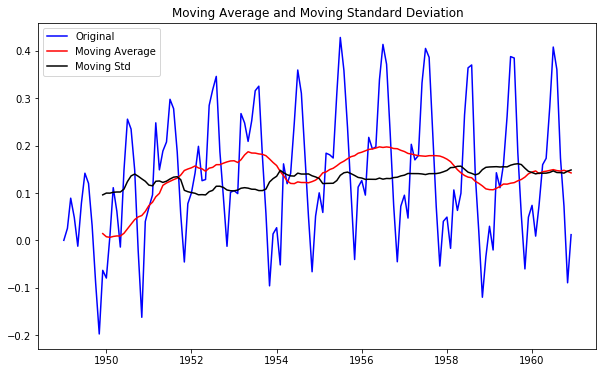

Results from the Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

The dataset is stationary


In [23]:
test_stationarity(dfDiff1)

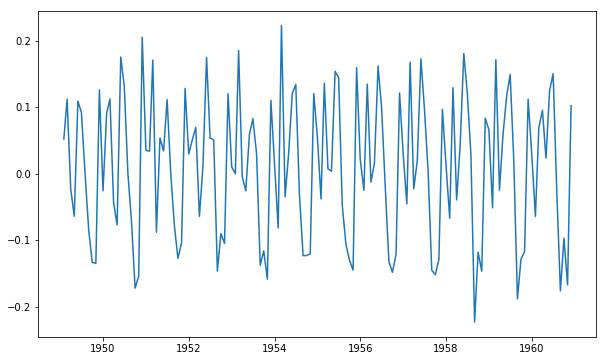

In [24]:
dfDiffShift = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(dfDiffShift)

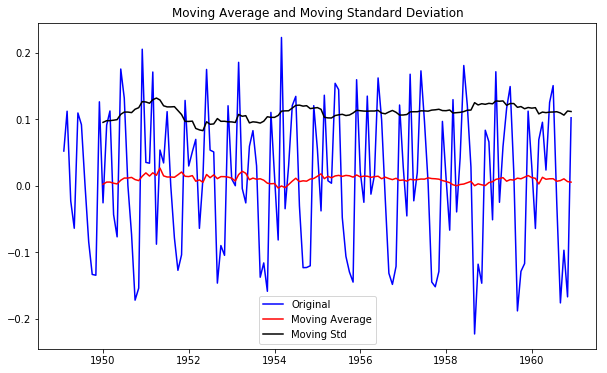

Results from the Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64

The dataset is stationary


In [25]:
dfDiffShift.dropna(inplace = True)
test_stationarity(dfDiffShift)

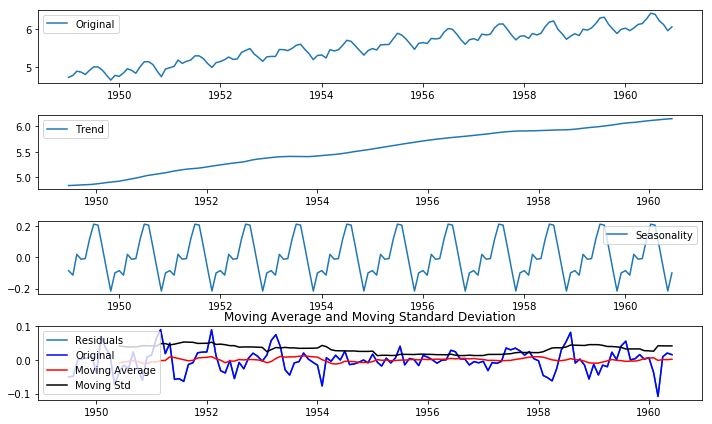

Results from the Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64

The dataset is stationary


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLgDf = residual
decomposedLgDf.dropna(inplace = True)
test_stationarity(decomposedLgDf)

In [27]:
residual

,#Passengers
Month,
1949-07-01,-0.050884
1949-08-01,-0.048415
1949-09-01,0.001223
1949-10-01,0.003156
1949-11-01,0.005749
1949-12-01,0.011045
1950-01-01,-0.039093
1950-02-01,0.069306
1950-03-01,0.037236
